# Activity 3

As a reminder the objective of this study is to predict the total claim amount of a customer and study/investigate the impact of the factors (input features) on the target variable(total claim amount). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fileM = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")

In [2]:
fileM

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


### Getting the numeric data into dataframe called numerical using np.number

In [3]:
numerical = fileM.select_dtypes(include=np.number)

In [4]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [5]:
numerical["income"] > 40000

0         True
1         True
2        False
3         True
4        False
         ...  
10684     True
10685     True
10686    False
10687     True
10688     True
Name: income, Length: 10689, dtype: bool

In [6]:
type(numerical)

pandas.core.frame.DataFrame

### Getting categorical columns in a dataframe called categoricals using np.object

In [7]:
categoricals = fileM.select_dtypes(include=np.object) # or exclude=np.number

C:\Users\h_wei\AppData\Local\Temp\ipykernel_9476\2740407970.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = fileM.select_dtypes(include=np.object) # or exclude=np.number


In [8]:
categoricals

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


## Checking the normality of the numerical variables visually

Does Data have symmetric bell shape? 

### Using seaborn library to construct distribution plots for the numerical variables

In [9]:
numerical.columns.values.tolist()

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

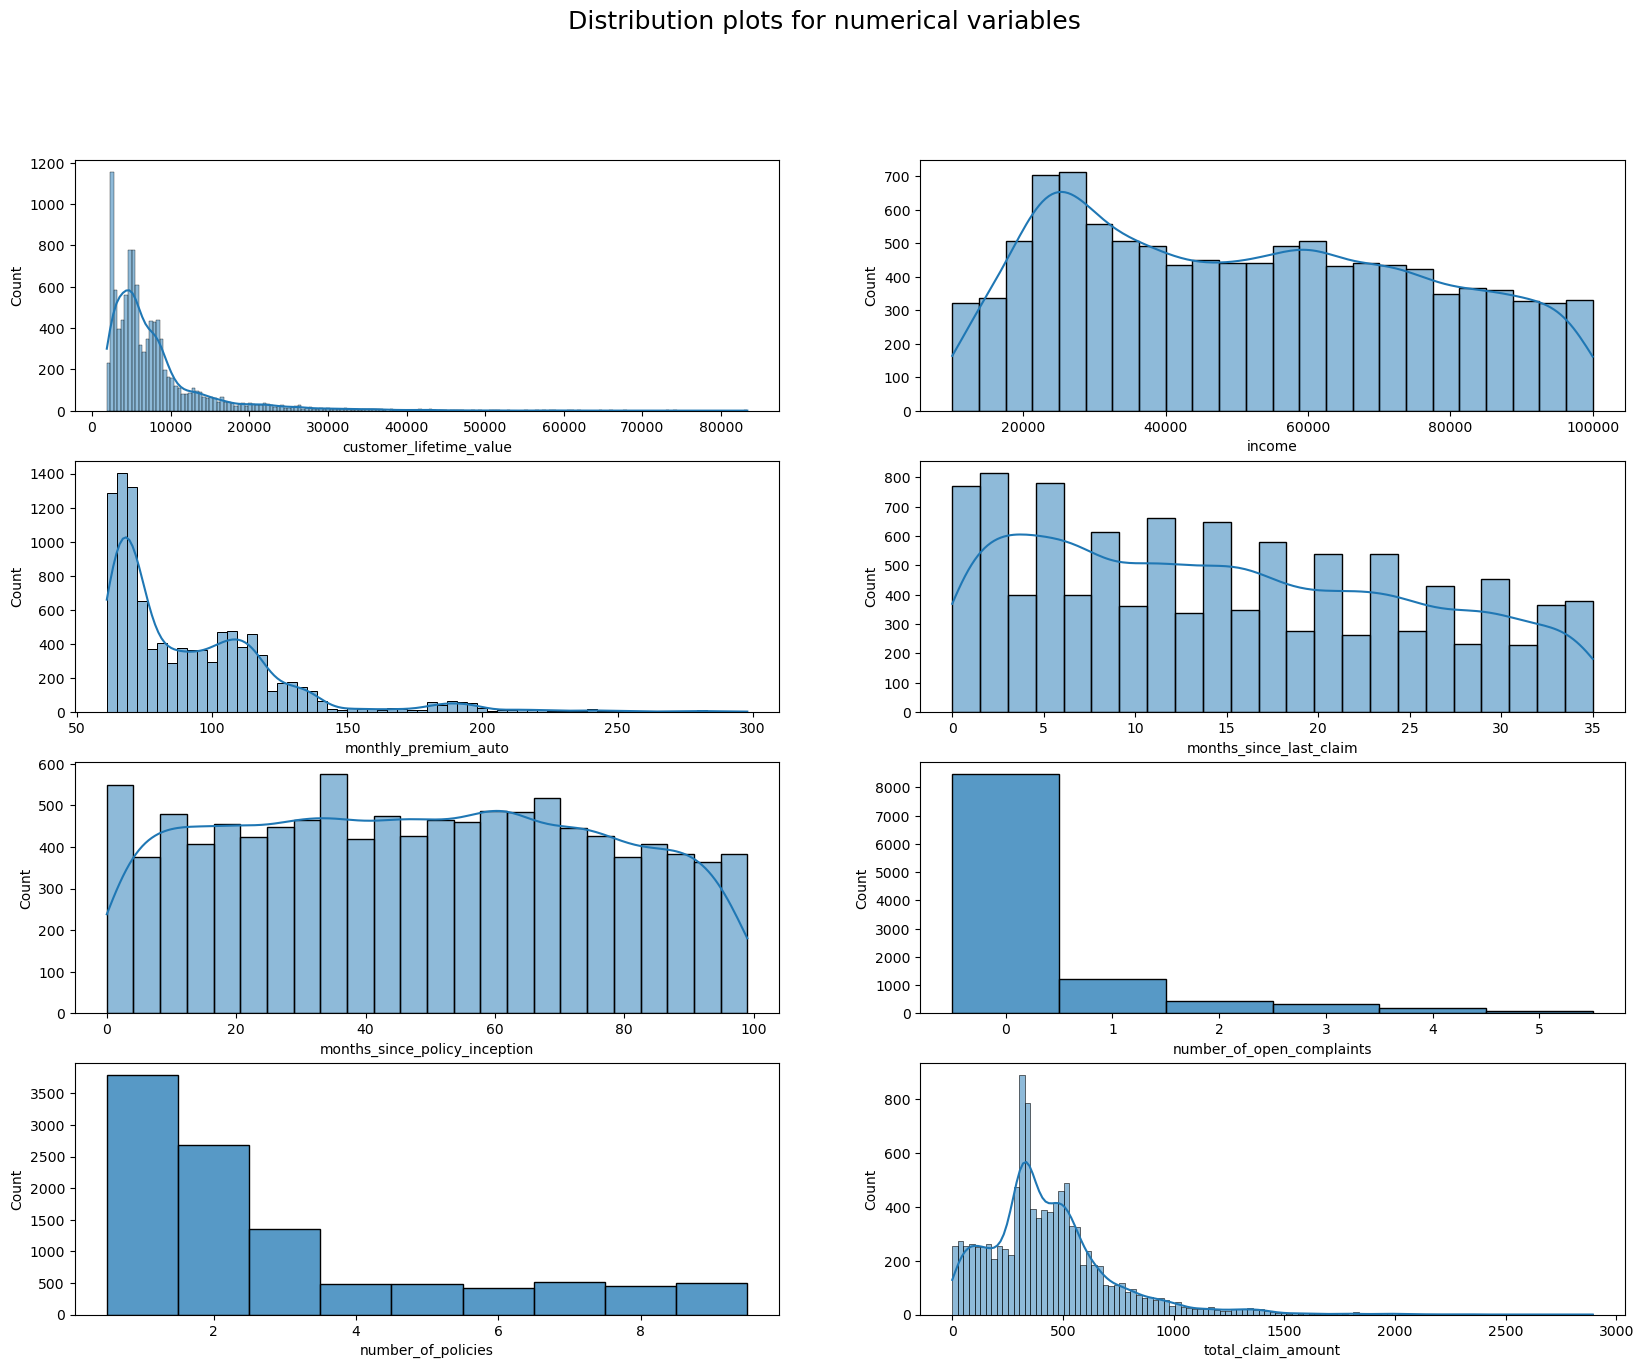

In [10]:
fig, ax = plt.subplots(4,2, figsize=(20,15))
fig.suptitle("Distribution plots for numerical variables", fontsize=18)
_=sns.histplot(numerical, x="customer_lifetime_value", kde = True, ax = ax[0,0])
_=sns.histplot(numerical, x="income", ax = ax[0,1], kde = True)
_=sns.histplot(numerical, x="monthly_premium_auto", ax = ax[1,0],kde = True)
_=sns.histplot(numerical, x="months_since_last_claim", ax = ax[1,1],kde = True)
_=sns.histplot(numerical, x="months_since_policy_inception", ax = ax[2,0],kde = True)
_=sns.histplot(numerical, x="number_of_open_complaints", discrete=True, ax = ax[2,1],kde = False) #because disrete data, line makes no sense
_=sns.histplot(numerical, x="number_of_policies", discrete=True, binwidth=0.9, ax = ax[3,0])
_=sns.histplot(numerical, x="total_claim_amount", ax = ax[3,1],kde = True)

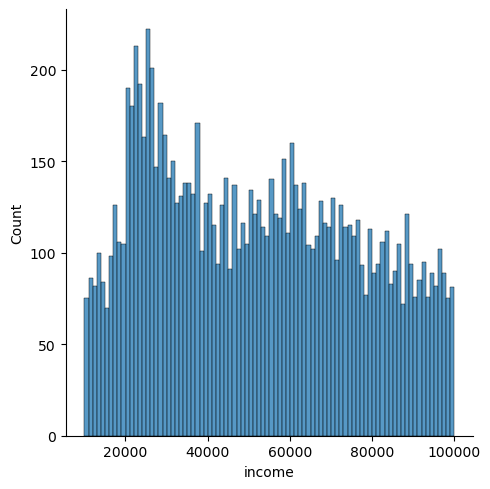

In [11]:
sns.displot(numerical, x="income", binwidth=1000) #means first bin goes from 0 to 1000Dollar

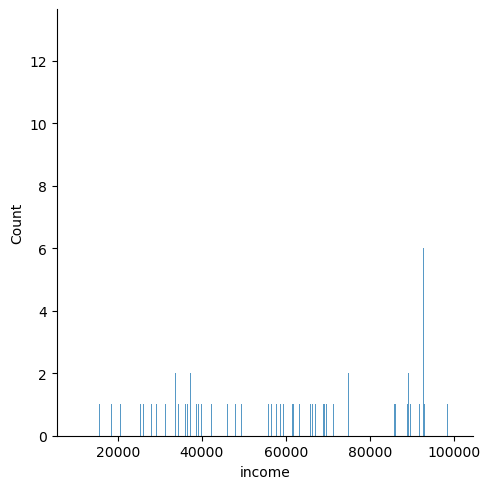

In [12]:
sns.displot(numerical, x="income", binwidth=1)

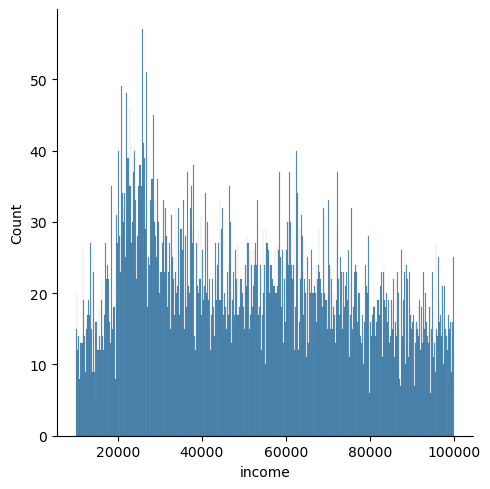

In [13]:
sns.displot(numerical, x="income", bins=500)

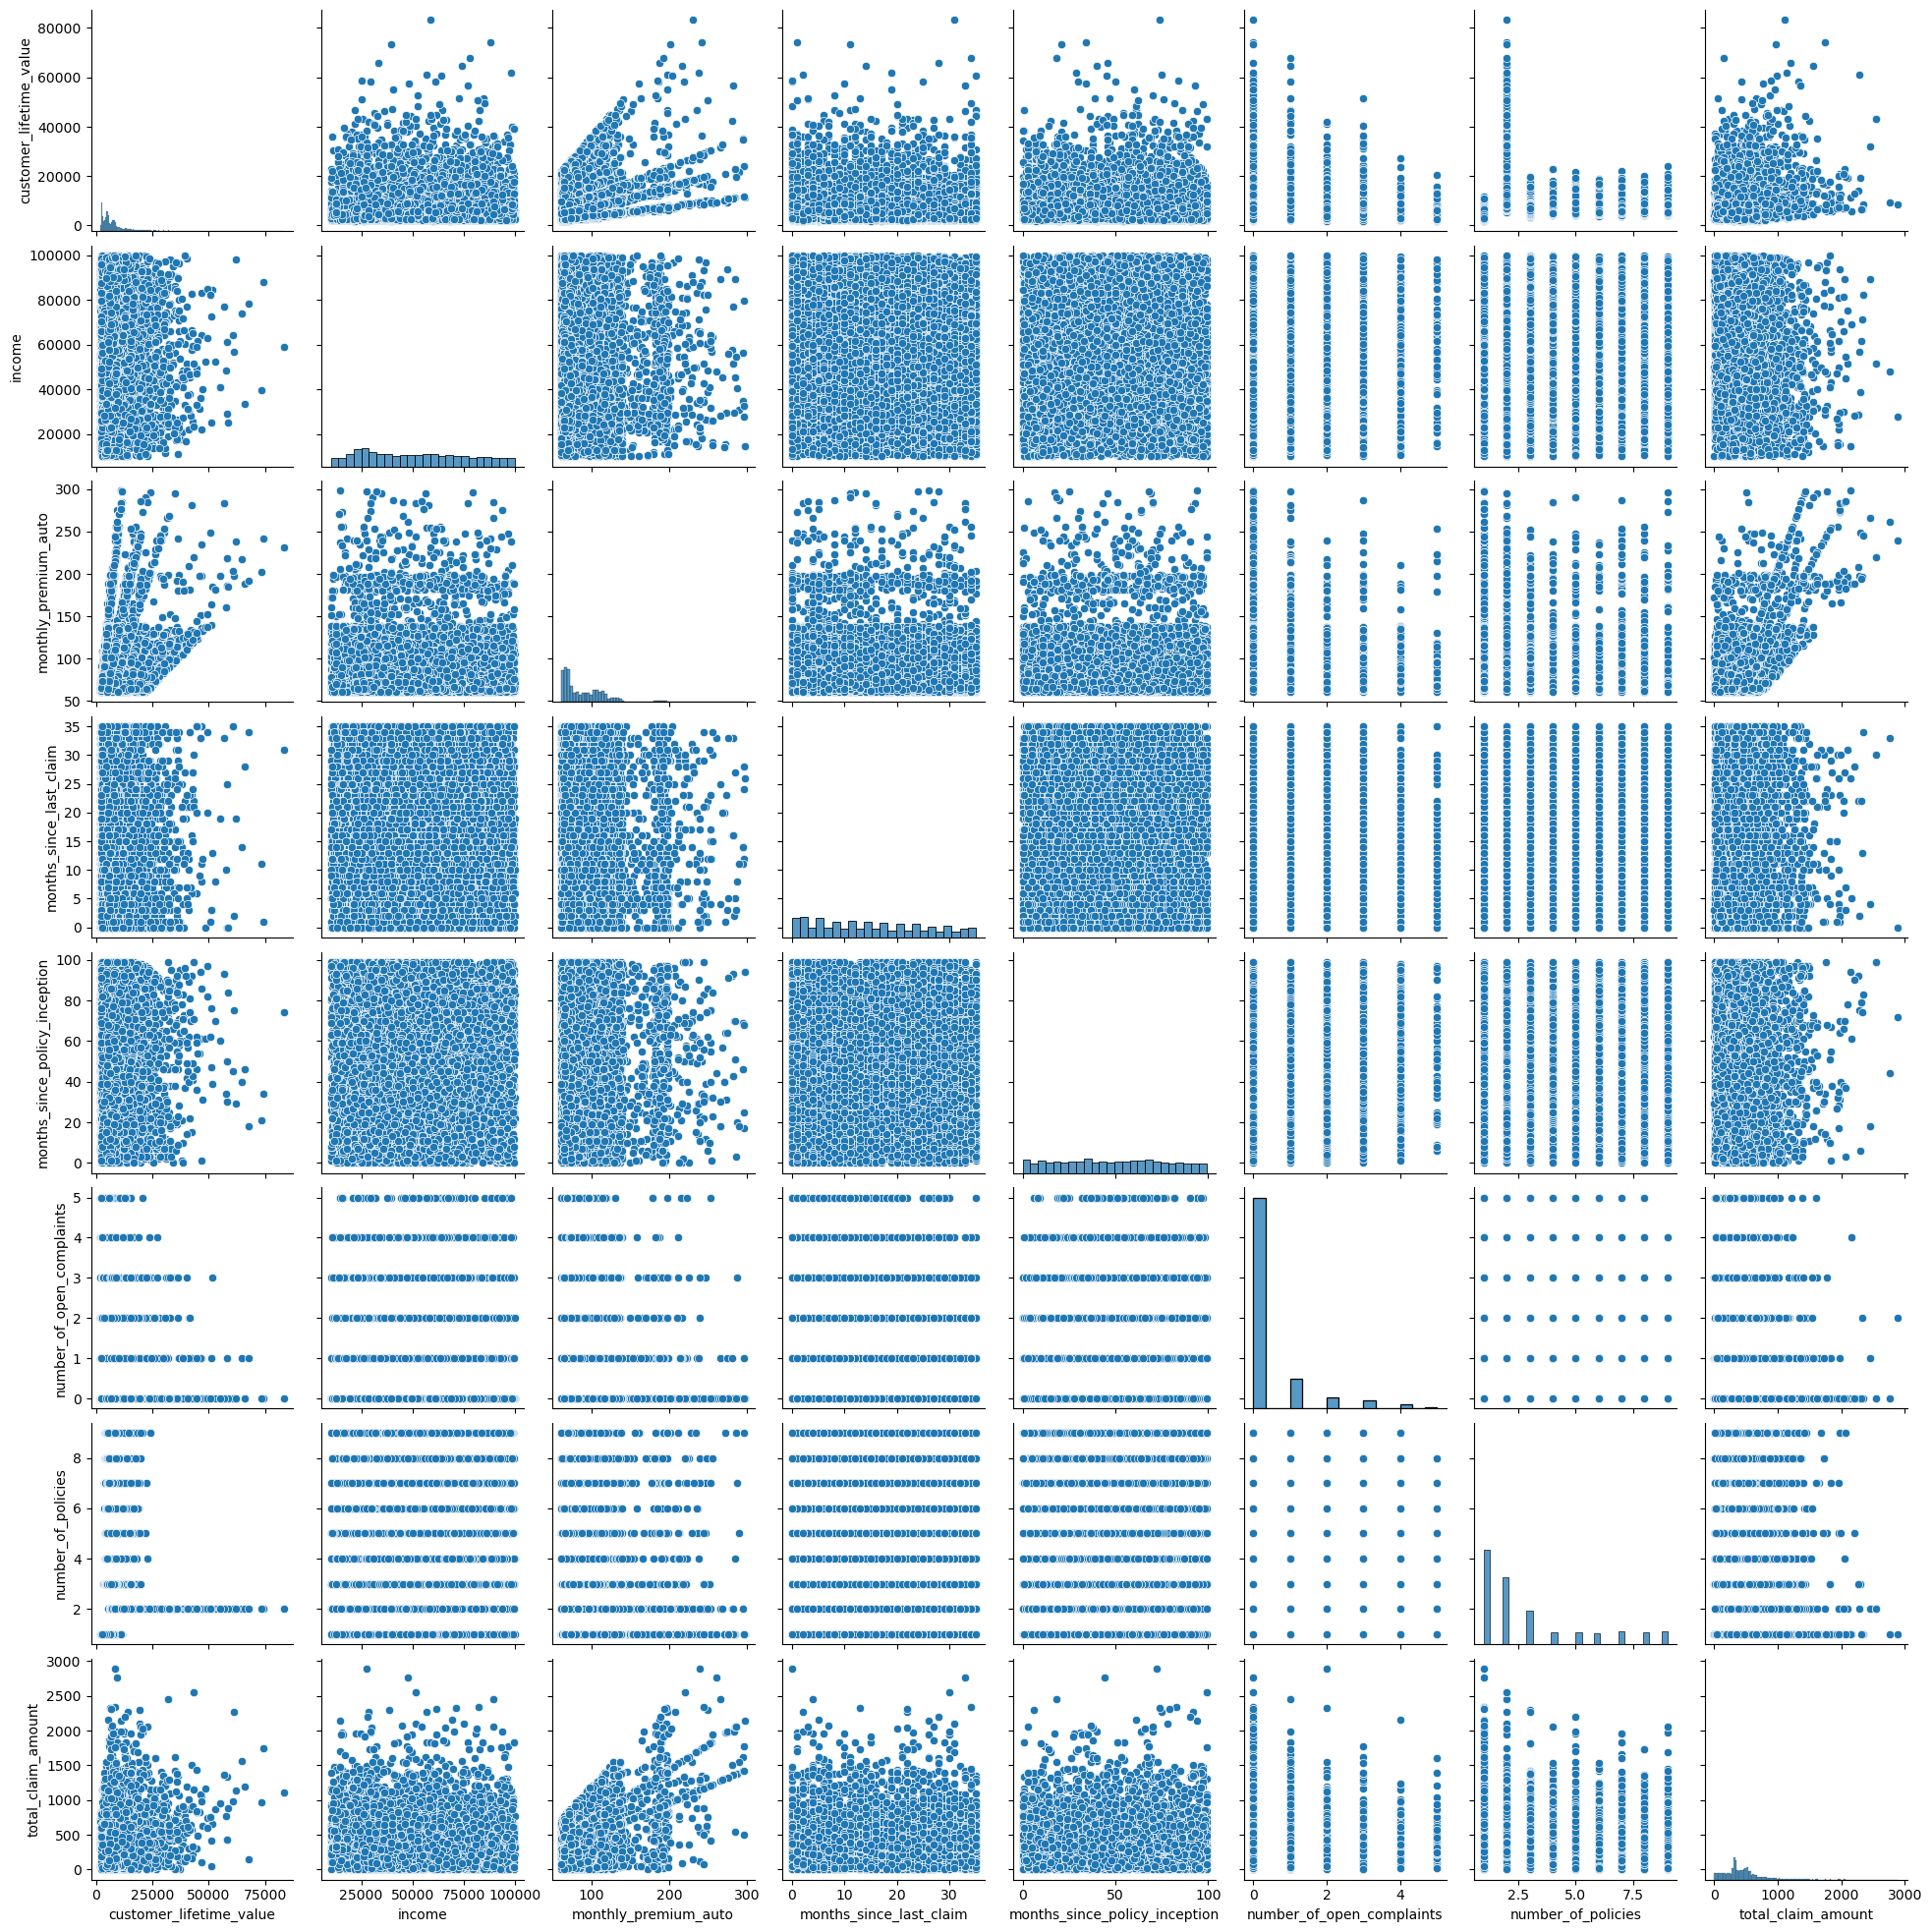

In [14]:
sns.pairplot(numerical)

### Using Matplotlib to construct histograms

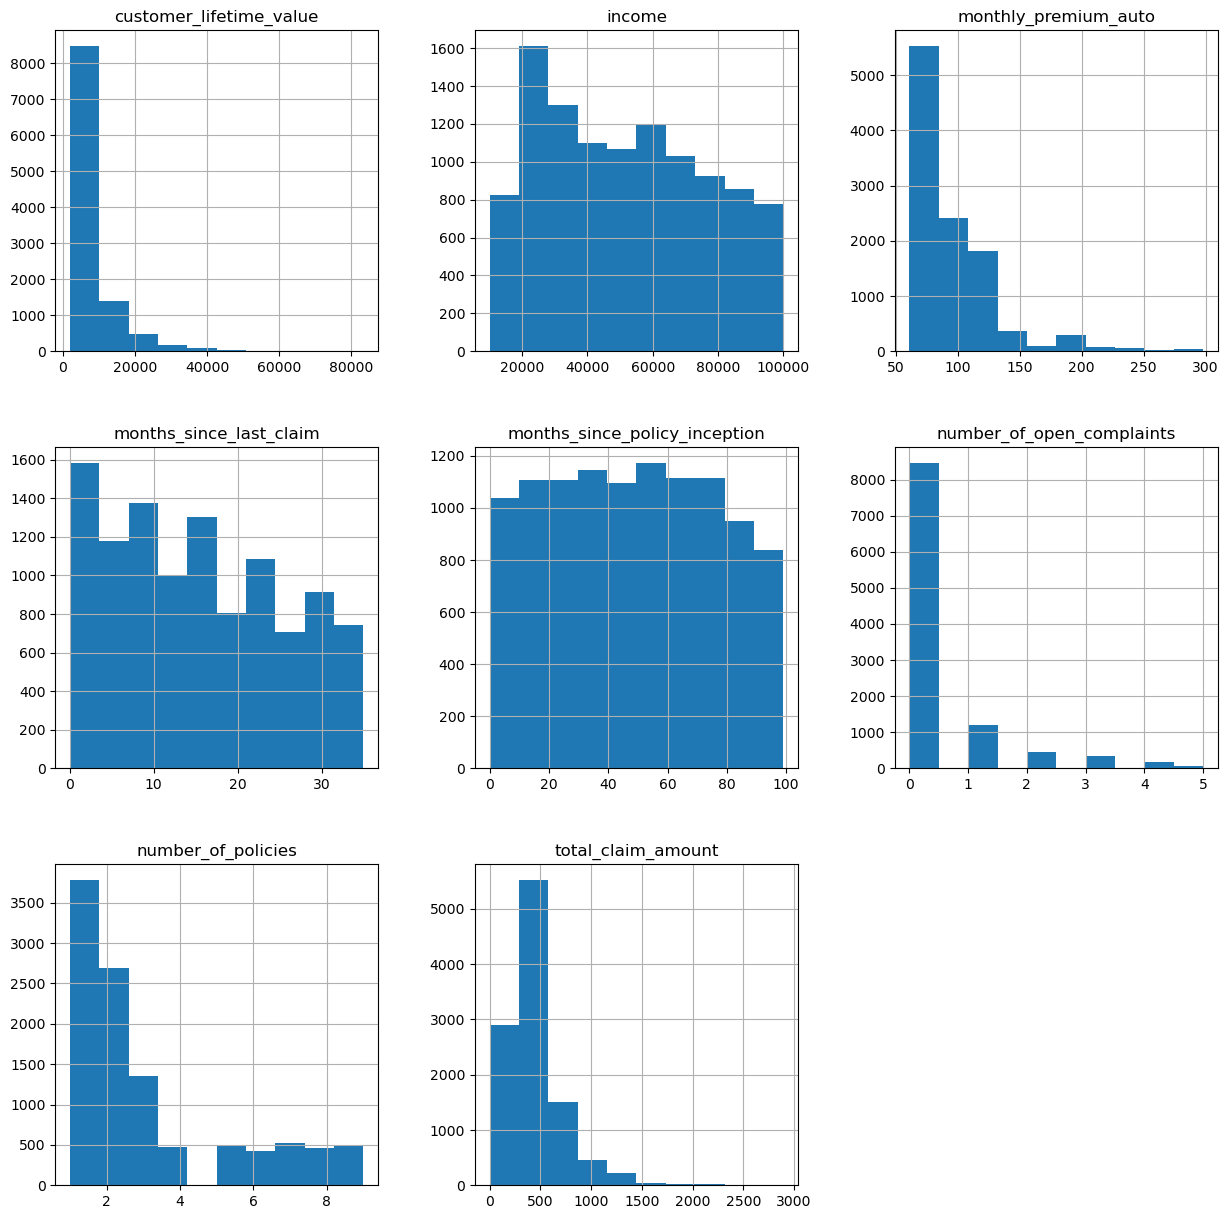

In [15]:
_=numerical.hist(figsize=(15,15))

In [16]:
#problem: number_of_policies no value 5 showing

In [18]:
mean_customer_lifetime_value = numerical["customer_lifetime_value"].mean()

In [20]:
mean_customer_lifetime_value

8011.906726541304

In [55]:
print(numerical.hist.__doc__)


    Make a histogram of the DataFrame's columns.

    A `histogram`_ is a representation of the distribution of data.
    This function calls :meth:`matplotlib.pyplot.hist`, on each series in
    the DataFrame, resulting in one histogram per column.

    .. _histogram: https://en.wikipedia.org/wiki/Histogram

    Parameters
    ----------
    data : DataFrame
        The pandas object holding the data.
    column : str or sequence, optional
        If passed, will be used to limit data to a subset of columns.
    by : object, optional
        If passed, then used to form histograms for separate groups.
    grid : bool, default True
        Whether to show axis grid lines.
    xlabelsize : int, default None
        If specified changes the x-axis label size.
    xrot : float, default None
        Rotation of x axis labels. For example, a value of 90 displays the
        x labels rotated 90 degrees clockwise.
    ylabelsize : int, default None
        If specified changes the y-axis lab

### Exkurs: Changing bin number from 10 to 8

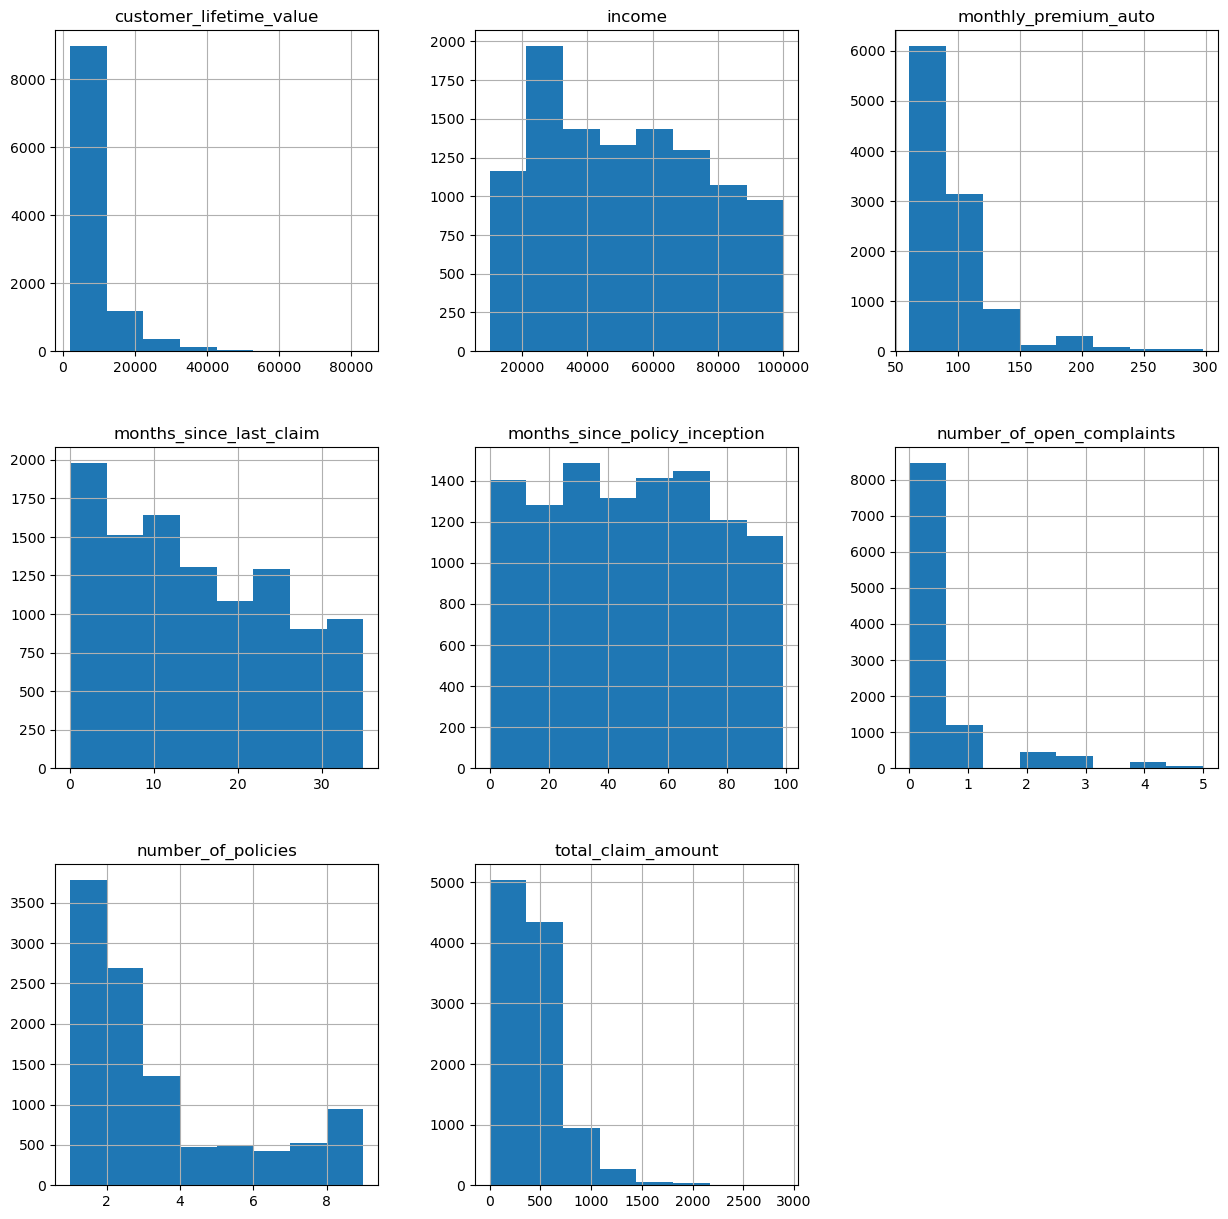

In [34]:
_=numerical.hist(figsize=(15,15),bins=8)

### Checking for correlation between the input features (this does not include the target feature total_claim_amount)

In [35]:
correlations = numerical.corr()
print(correlations)

                               customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.003732   
income                                        0.003732  1.000000   
monthly_premium_auto                          0.404235 -0.002431   
months_since_last_claim                       0.011912 -0.026564   
months_since_policy_inception                 0.017055  0.003846   
number_of_open_complaints                    -0.032371  0.018903   
number_of_policies                            0.016789 -0.004461   
total_claim_amount                            0.232849 -0.111221   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.404235                 0.011912   
income                                    -0.002431                -0.026564   
monthly_premium_auto                       1.000000                 0.010036   
months_since_last_claim                    0.010036                

### Visualizing positive correlation of 0.4

<AxesSubplot: xlabel='monthly_premium_auto', ylabel='customer_lifetime_value'>

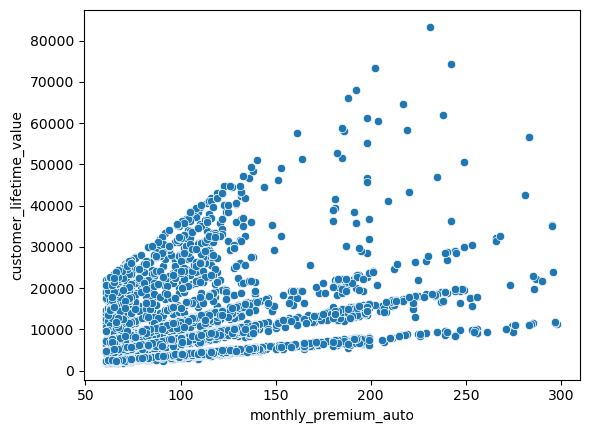

In [36]:
sns.scatterplot(x=numerical.monthly_premium_auto, y=numerical.customer_lifetime_value)

### Visualizing negative correlation of -0,03

<AxesSubplot: xlabel='number_of_open_complaints', ylabel='customer_lifetime_value'>

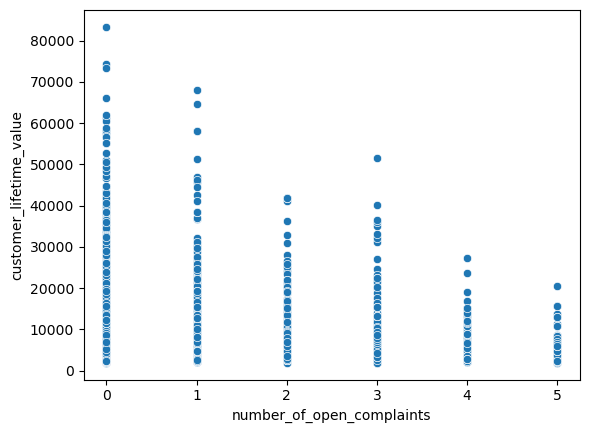

In [48]:
sns.scatterplot(x=numerical.number_of_open_complaints, y=numerical.customer_lifetime_value)

<AxesSubplot: xlabel='months_since_last_claim', ylabel='months_since_policy_inception'>

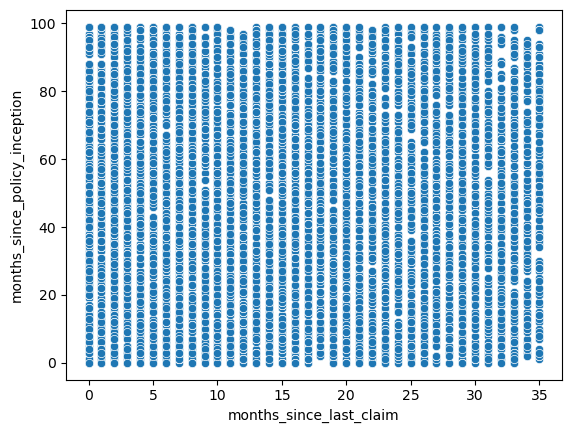

In [44]:
sns.scatterplot(x=numerical.months_since_last_claim, y=numerical.months_since_policy_inception)

### Plotting the Correlation Heatmap

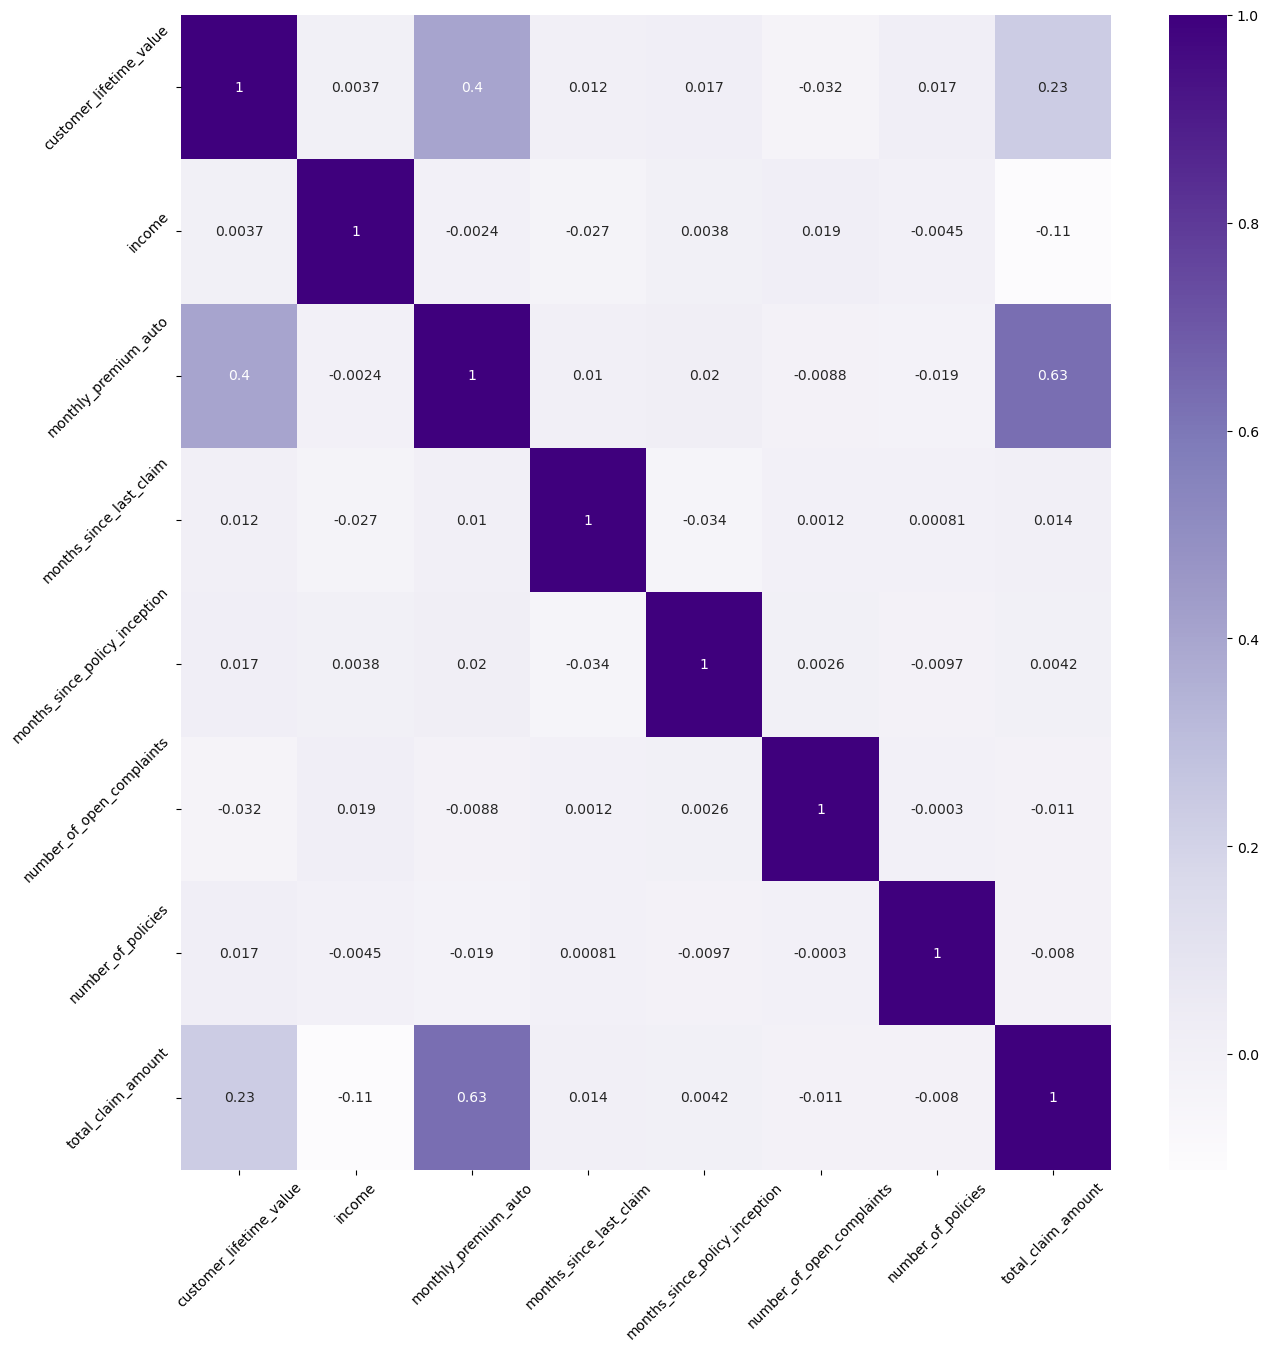

In [45]:
_, ax = plt.subplots(figsize=(15,15))
_=sns.heatmap(numerical.corr(),cmap = "Purples", annot=True)
_=ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
_=ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

# Activity 4

### Showing a plot of the total number of responses


In [119]:
fileM

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


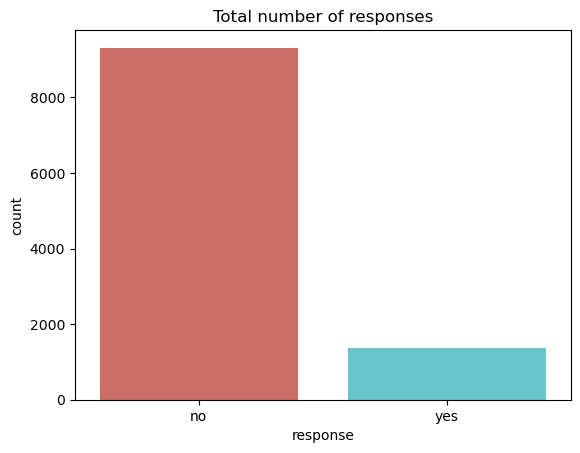

In [38]:
fig = sns.countplot(categoricals, x="response", color = "blue", palette = "hls").set(title="Total number of responses")

### Showing a plot of the response by the sales channel

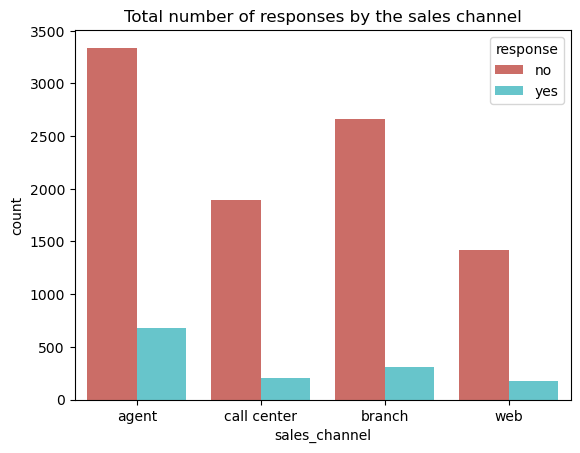

In [112]:
fig1 = sns.countplot(categoricals, x="sales_channel", hue ="response", color = "blue", palette = "hls").set(title="Total number of responses by the sales channel")

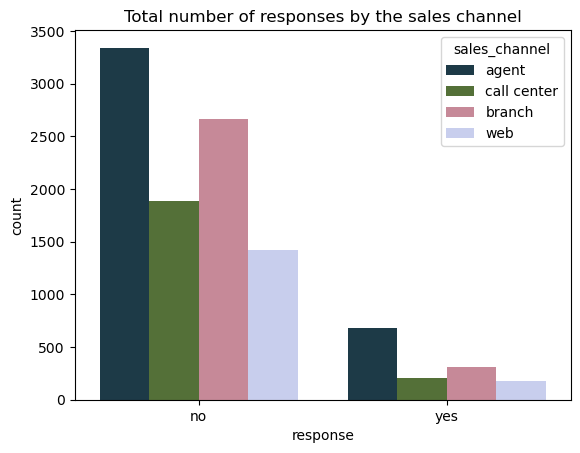

In [113]:
fig2 = sns.countplot(categoricals, x="response", hue ="sales_channel", color = "blue", palette = "cubehelix").set(title="Total number of responses by the sales channel")

### Showing a plot of the response by the total claim amount

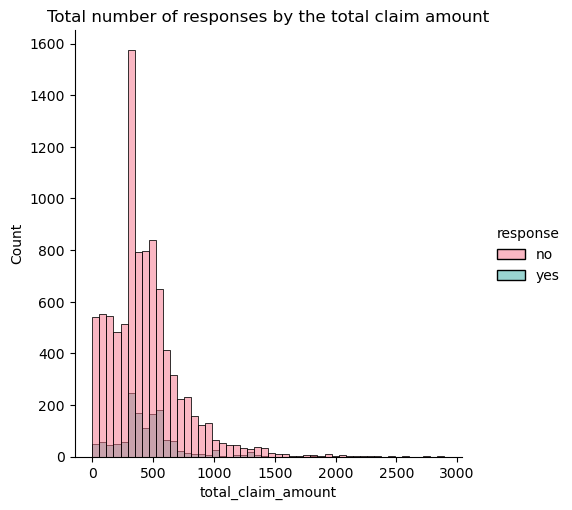

In [114]:
fig3 = sns.displot(fileM, x="total_claim_amount", hue ="response", palette = "husl",bins=50).set(title="Total number of responses by the total claim amount")

### Showing a plot of the response by income

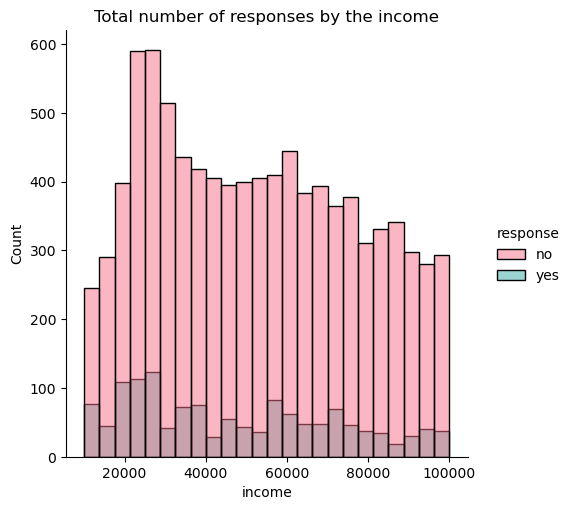

In [115]:
fig4 = sns.displot(fileM, x="income", hue ="response", palette = "husl").set(title="Total number of responses by the income")

### Plotting interesting insights about the data set

In [40]:
fileM["total_revenue"] = (fileM["monthly_premium_auto"]*fileM["months_since_policy_inception"])-fileM["total_claim_amount"]

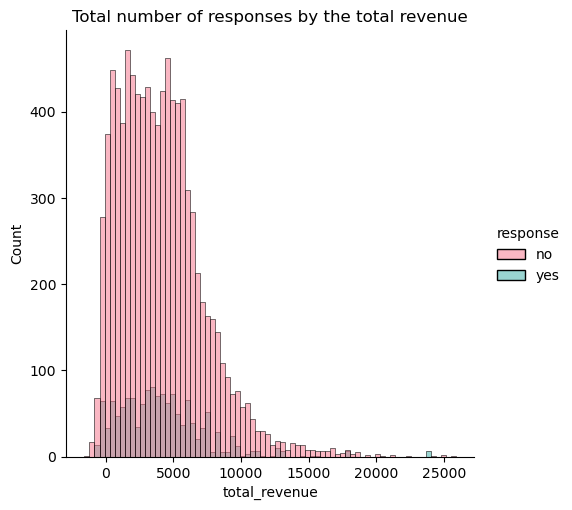

In [41]:
fig5 = sns.displot(fileM, x="total_revenue", hue ="response", palette = "husl").set(title="Total number of responses by the total revenue")

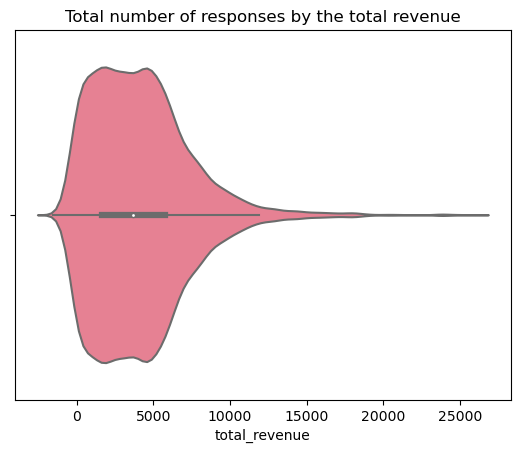

In [56]:
_= sns.violinplot(fileM, x="total_revenue", hue ="response", palette = "husl").set(title="Total number of responses by the total revenue")

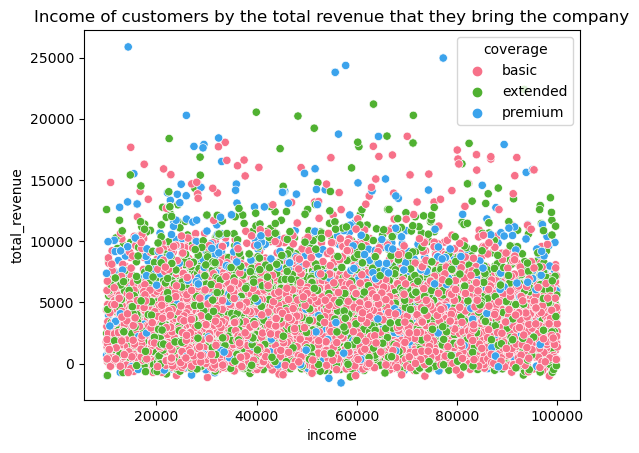

In [58]:
_ =sns.scatterplot(fileM, x="income",  y="total_revenue", hue="coverage", palette = "husl").set(title="Income of customers by the total revenue that they bring the company")